<a href="https://colab.research.google.com/github/KAVYAKAVYA29/EDA/blob/main/Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import the os module

# Load the dataset
file_path = '/content/PPGE.csv'  # Replace this with your uploaded file path if necessary
df = pd.read_csv(file_path)



In [12]:
# Load the dataset
file_path = '/content/PPGE.csv'  # Replace this with your uploaded file path if necessary
df = pd.read_csv(file_path)

# 1. Dataset Exploration
# Dimensions
print("Shape of the dataset:", df.shape)

# Summary
print("\nSummary of the dataset:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())


Shape of the dataset: (1020, 10)

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rownames        1020 non-null   int64  
 1   country         1020 non-null   object 
 2   iso3c           1020 non-null   object 
 3   year            1020 non-null   int64  
 4   govtspendgdp    1020 non-null   float64
 5   tradegdp        1010 non-null   float64
 6   kaopen          988 non-null    float64
 7   ka_open         988 non-null    float64
 8   v2catrauni      1020 non-null   float64
 9   v2catrauni_ord  1020 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 79.8+ KB
None

Basic Statistics:
          rownames         year  govtspendgdp     tradegdp      kaopen  \
count  1020.000000  1020.000000   1020.000000  1010.000000  988.000000   
mean    510.500000  1995.000000     43.250523    66.694034  

In [13]:
# 2. Data Handling
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows:")
print(df.duplicated().sum())

# Handling missing values (example: fill with mean for numerical columns)
numerical_cols = df.select_dtypes(include=np.number).columns # Select only numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean()) # Apply fillna to numerical columns


# Handling duplicates
df = df.drop_duplicates()


Missing values:
rownames           0
country            0
iso3c              0
year               0
govtspendgdp       0
tradegdp          10
kaopen            32
ka_open           32
v2catrauni         0
v2catrauni_ord     0
dtype: int64

Duplicate rows:
0



Cleaned Data Sample:
   rownames    country iso3c  year  govtspendgdp   tradegdp    kaopen  \
0         1  Australia   AUS  1970     25.316267  26.153638 -0.159932   
1         2  Australia   AUS  1971     26.051857  25.554840 -0.159932   
2         3  Australia   AUS  1972     27.023659  24.757565 -0.159932   
3         4  Australia   AUS  1973     26.591579  25.131972 -0.159932   
4         5  Australia   AUS  1974     30.912184  26.322852 -0.159932   

   ka_open  v2catrauni  v2catrauni_ord  
0    0.417       2.265               4  
1    0.417       2.265               4  
2    0.417       2.265               4  
3    0.417       2.265               4  
4    0.417       2.265               4  


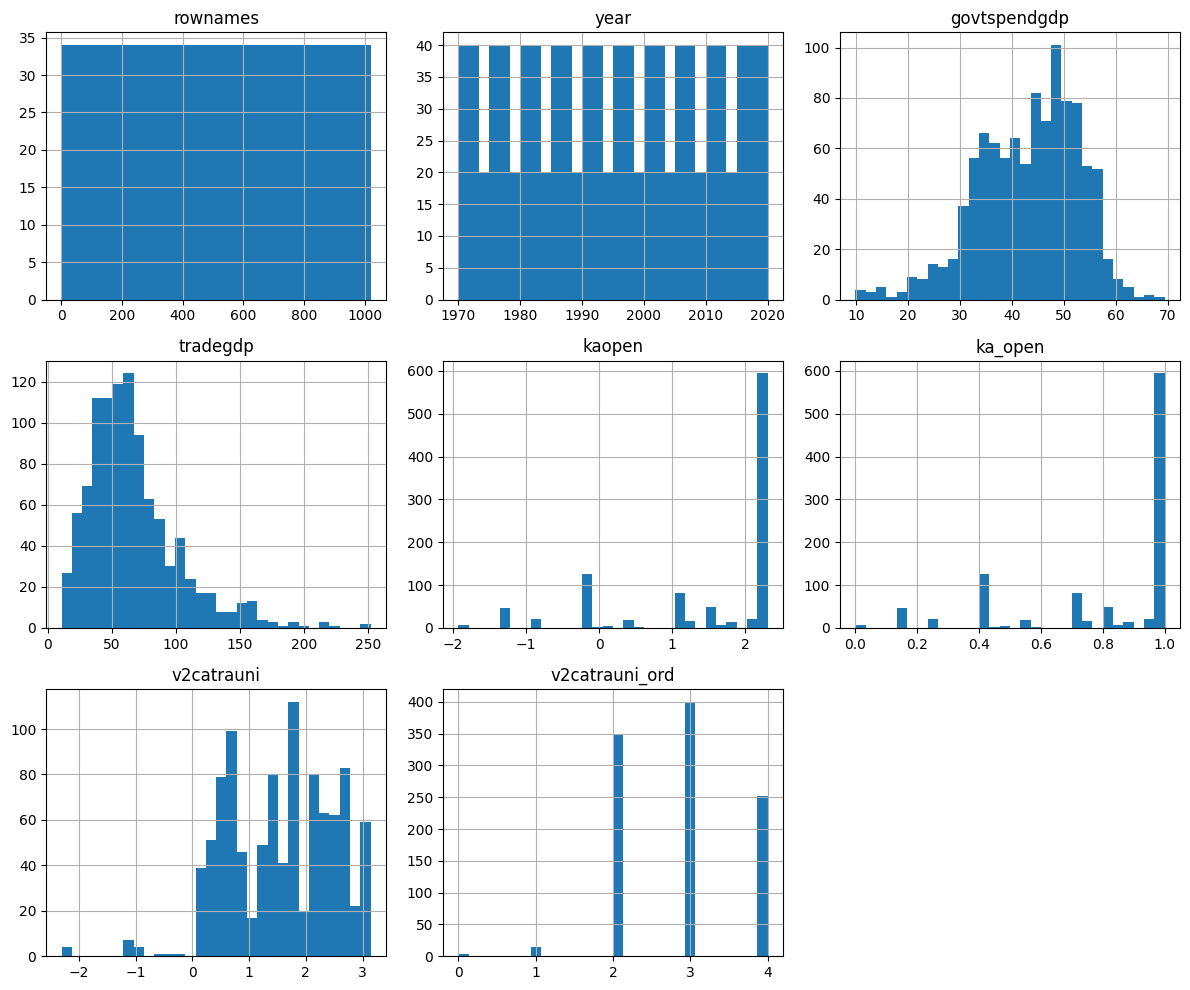

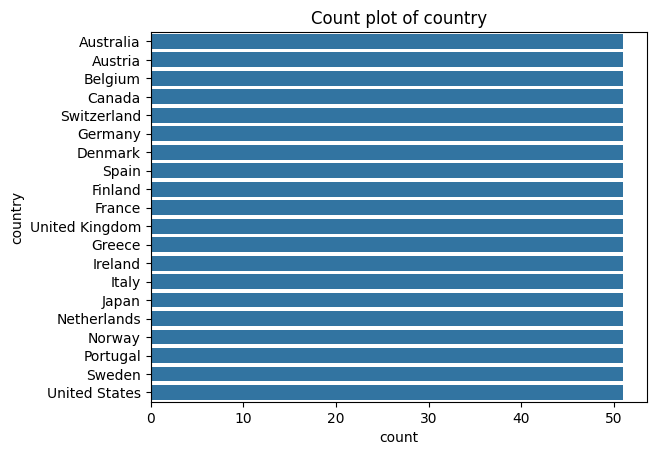

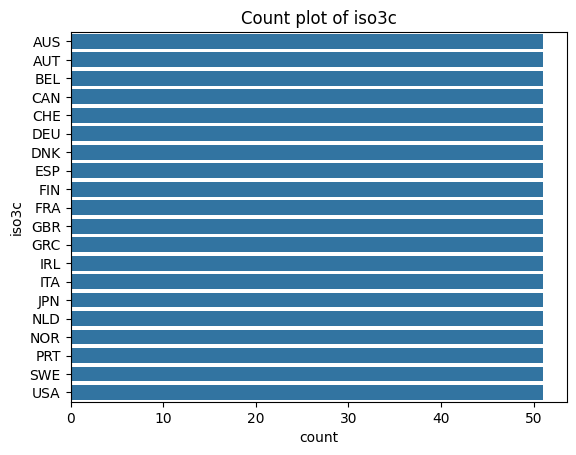

In [14]:
# 3. Data Cleaning
# Renaming columns (if needed)
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Convert categorical columns to proper format
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip())

print("\nCleaned Data Sample:")
print(df.head())

# 4. Univariate Analysis
# Distribution of numerical columns
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Count plot for categorical columns
for col in categorical_columns:
    sns.countplot(y=col, data=df)
    plt.title(f"Count plot of {col}")
    plt.show()


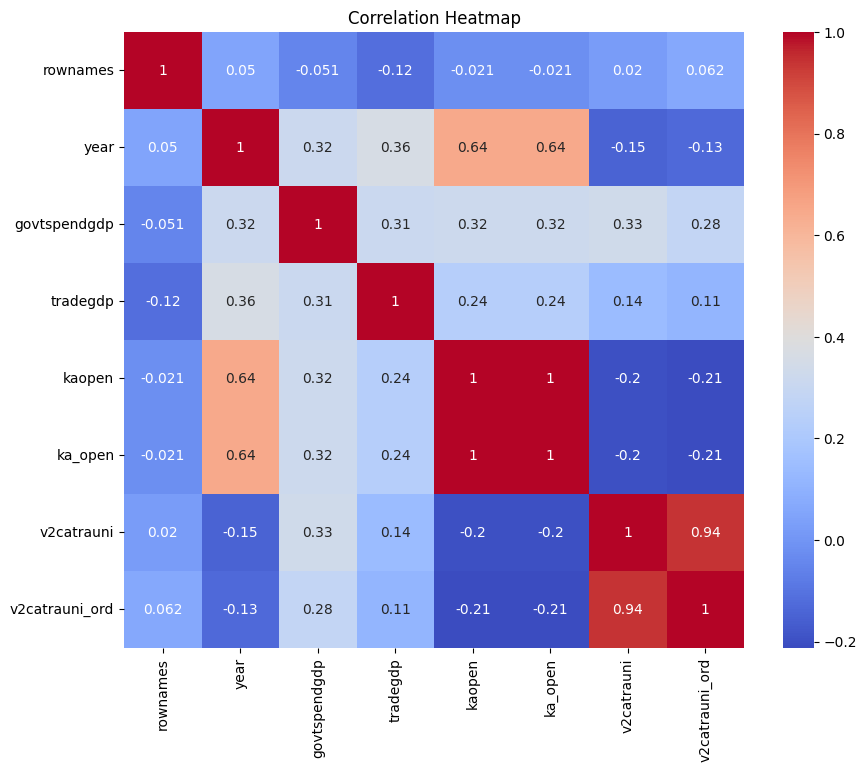

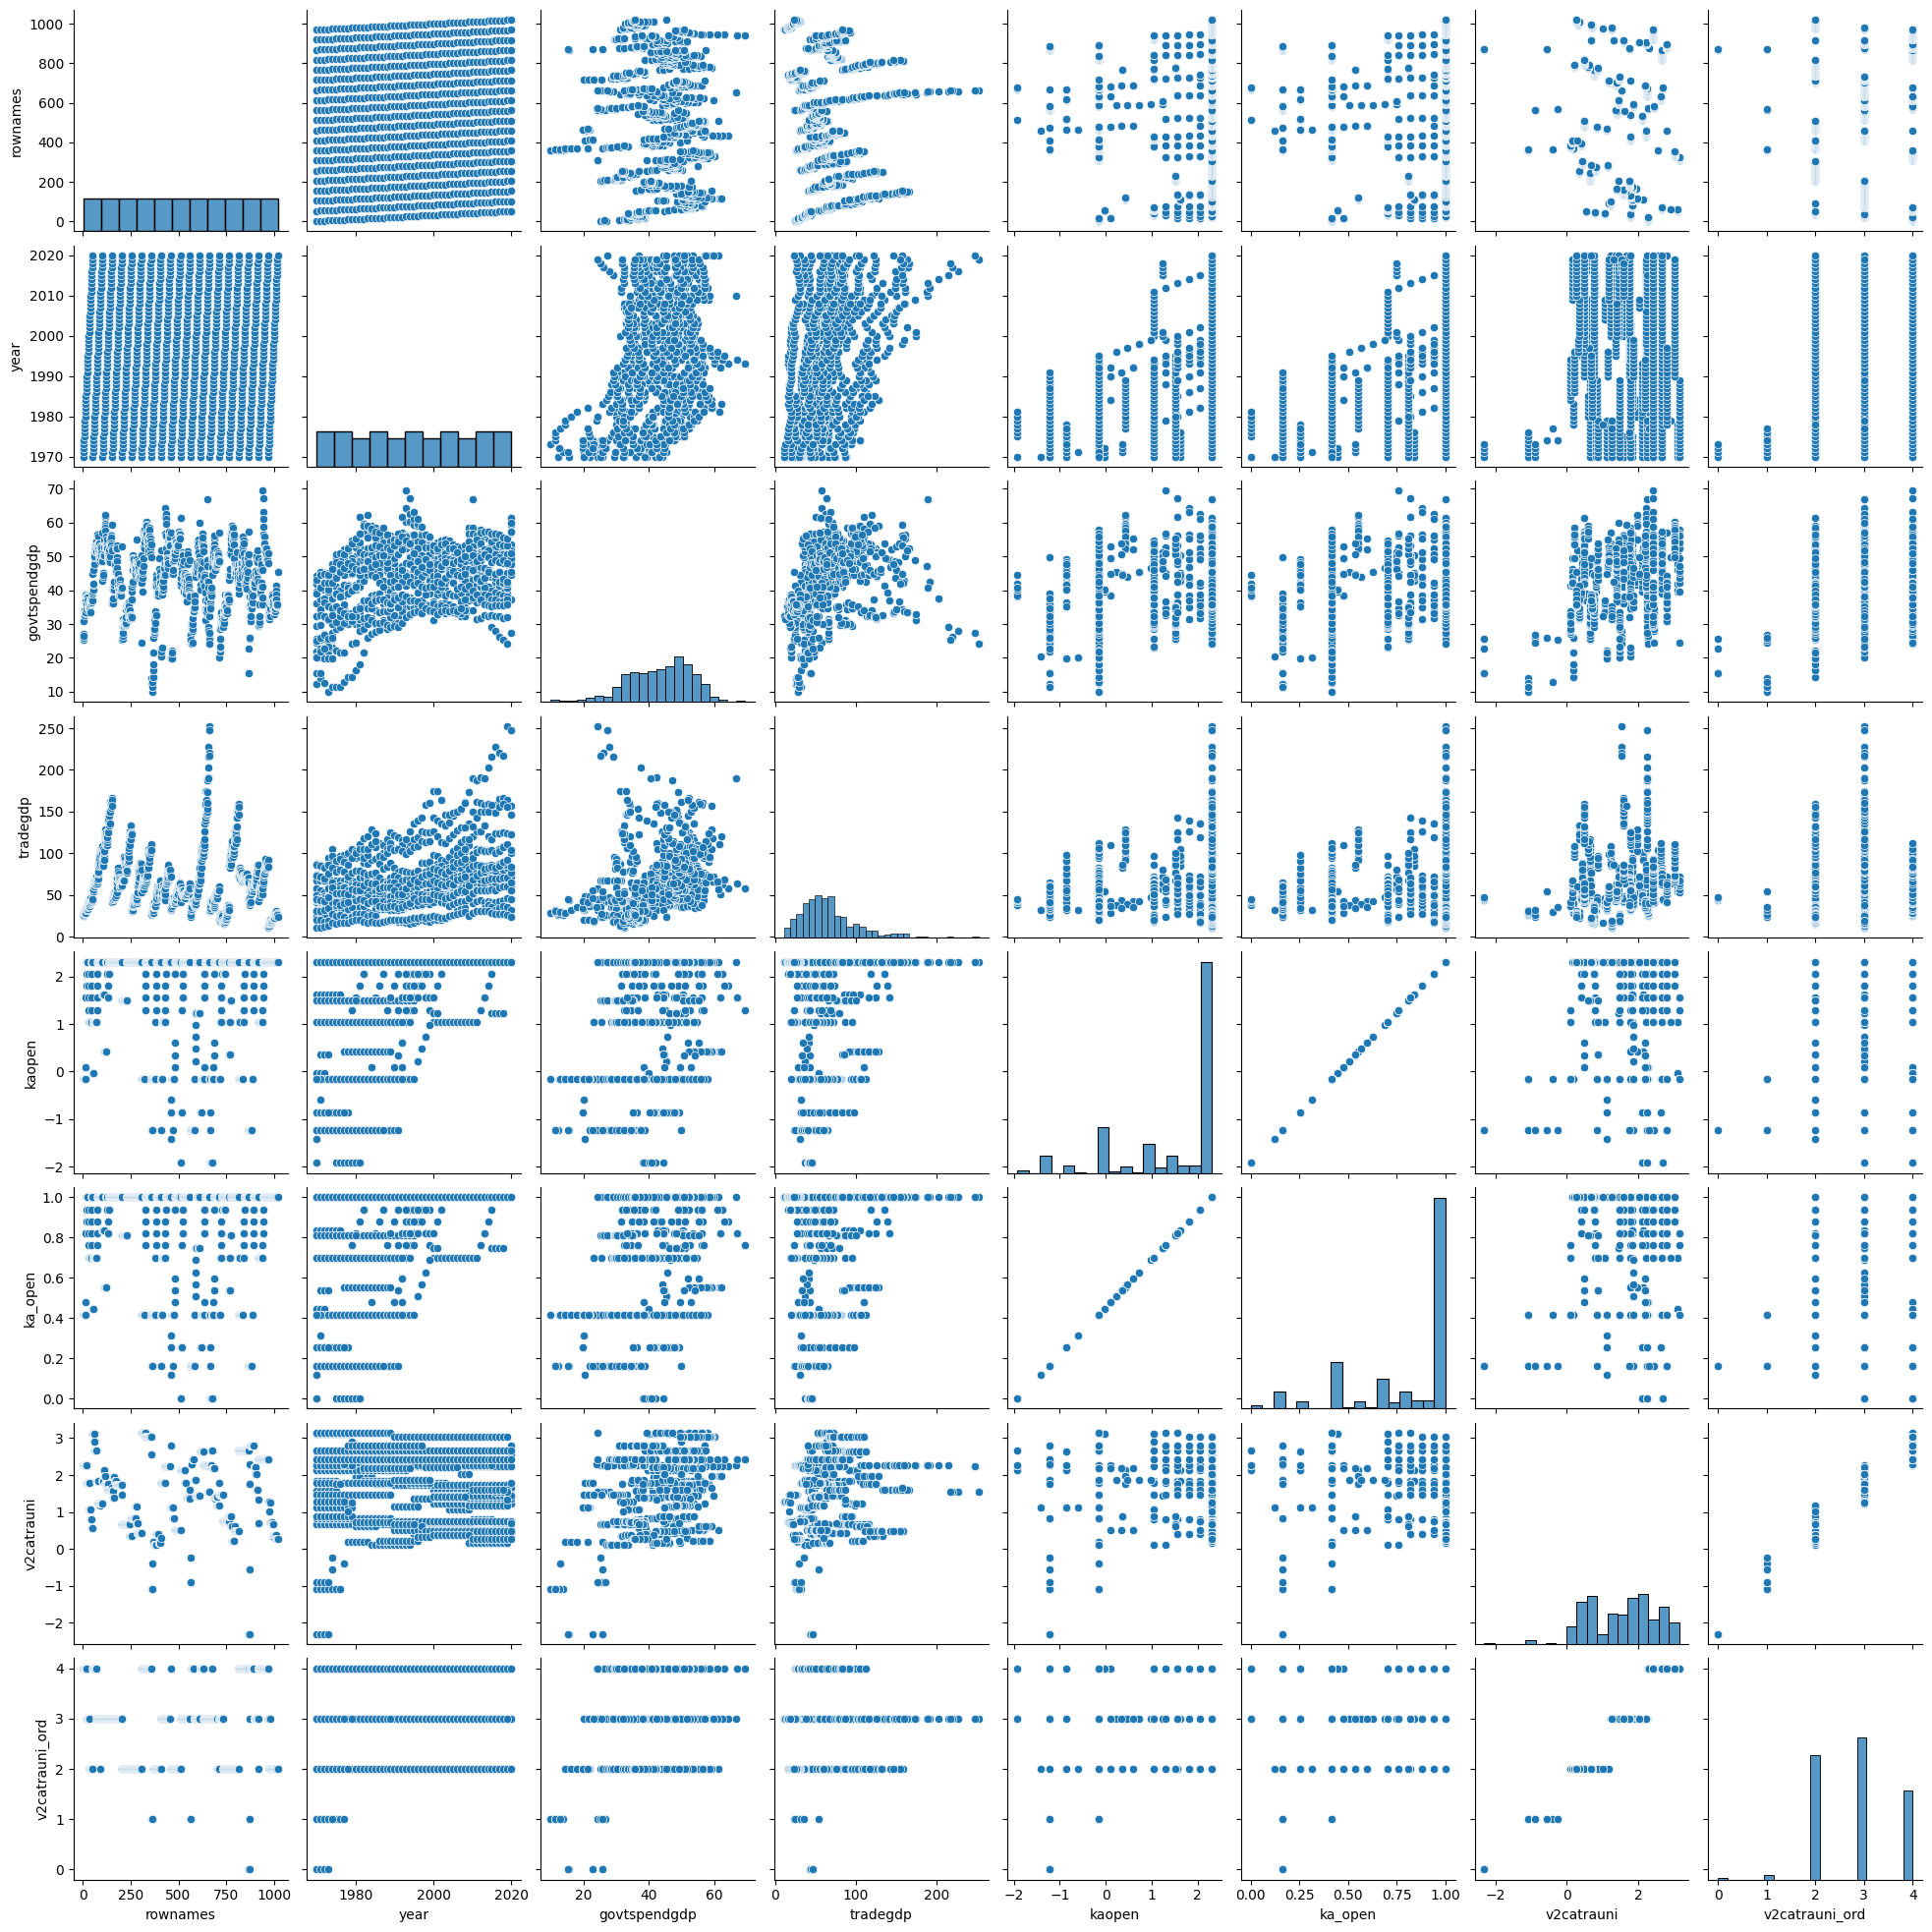

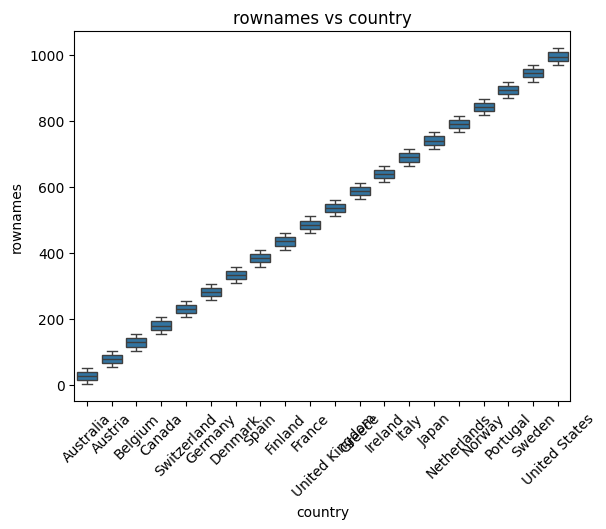

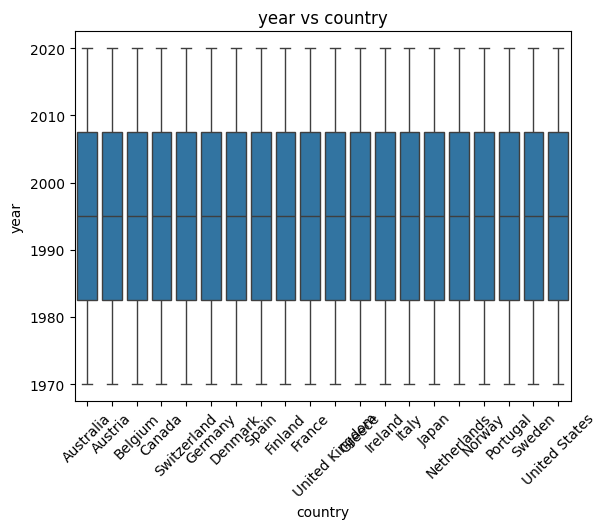

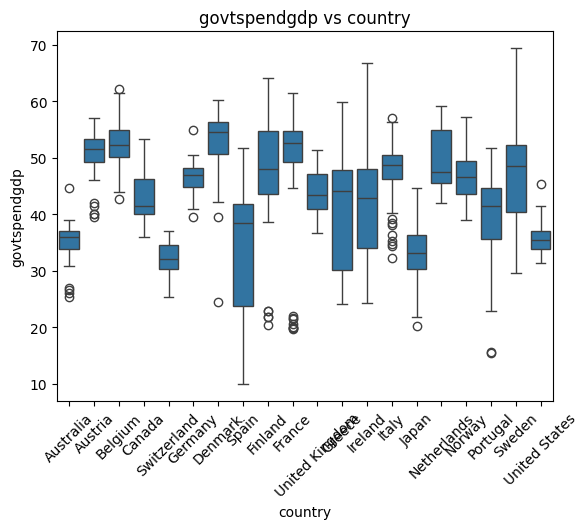

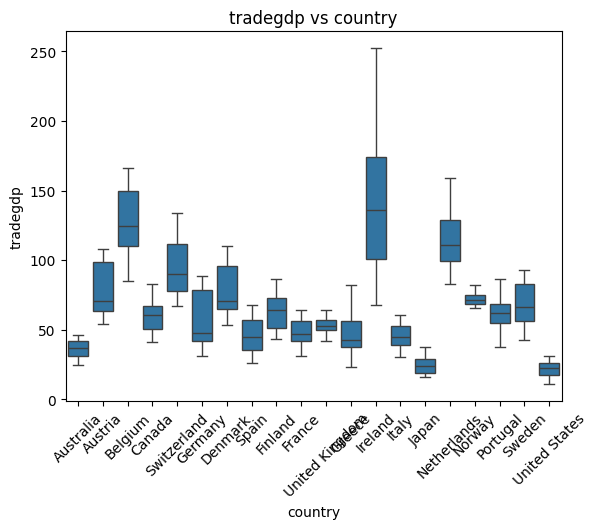

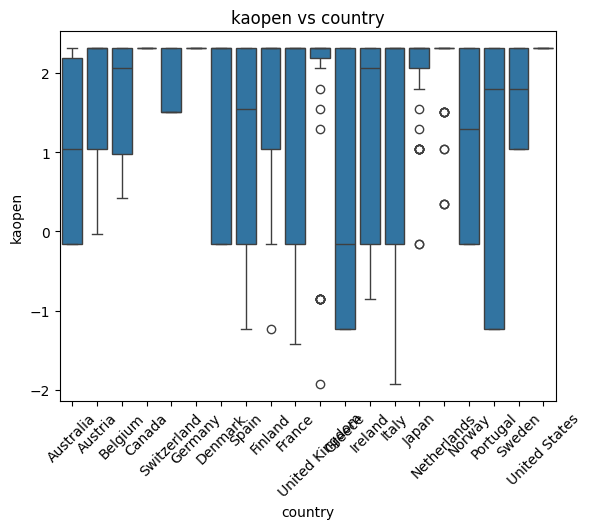

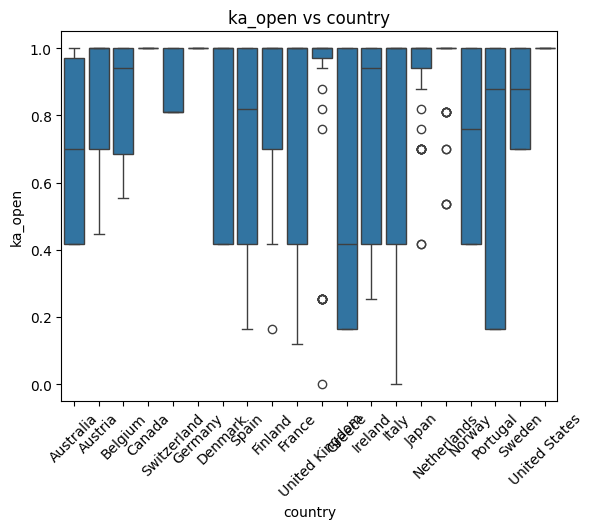

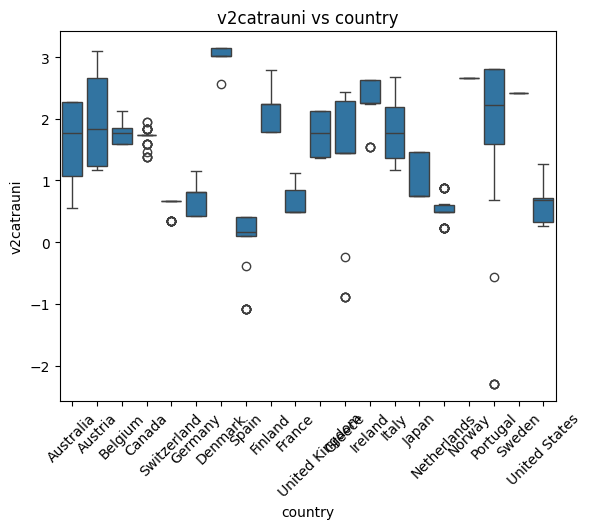

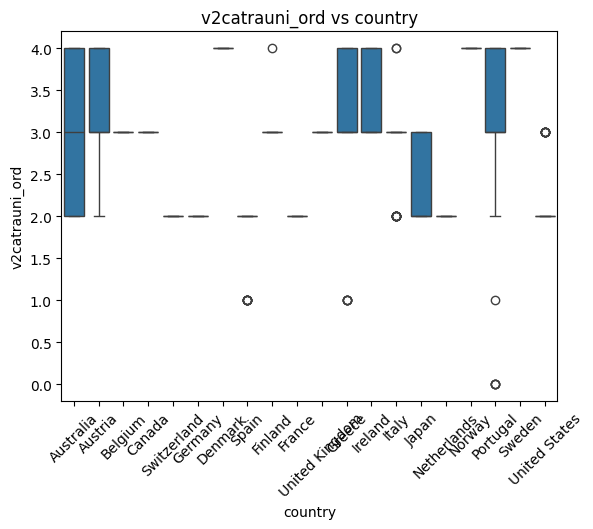

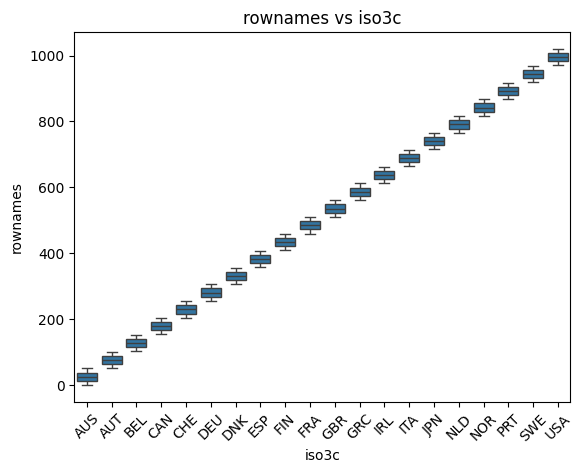

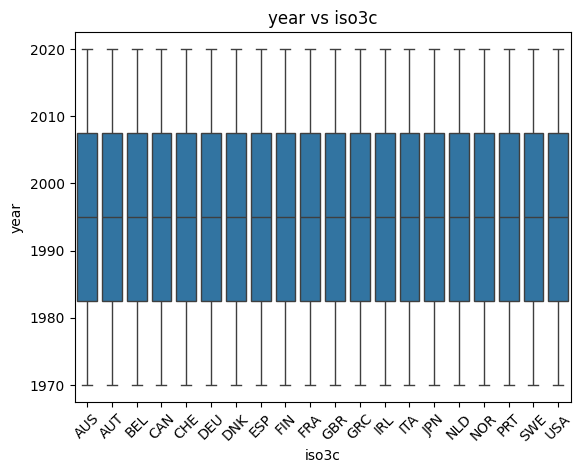

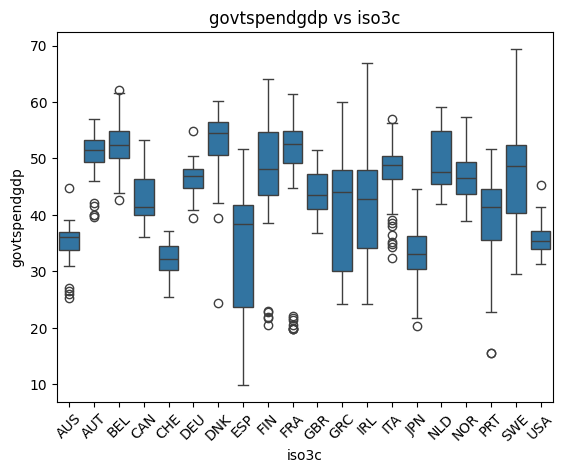

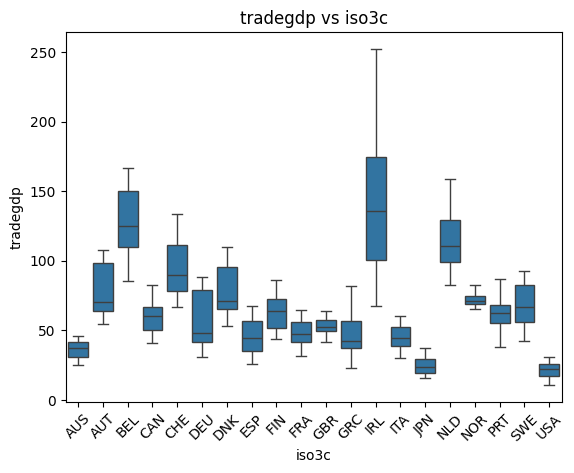

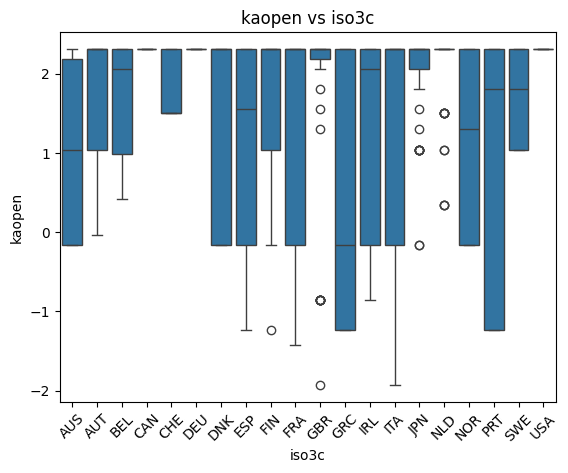

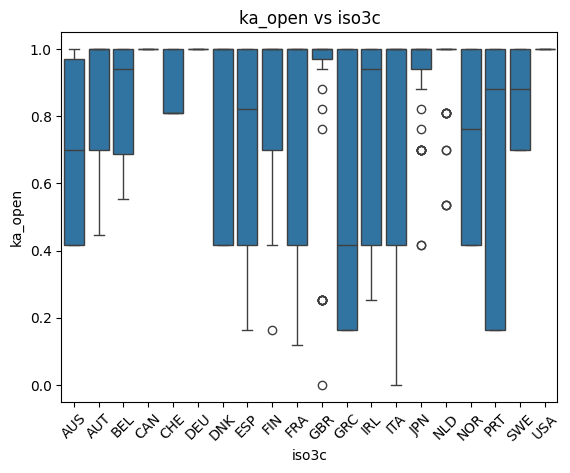

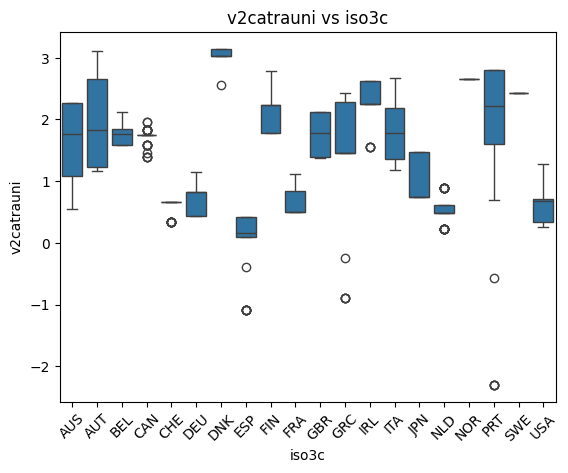

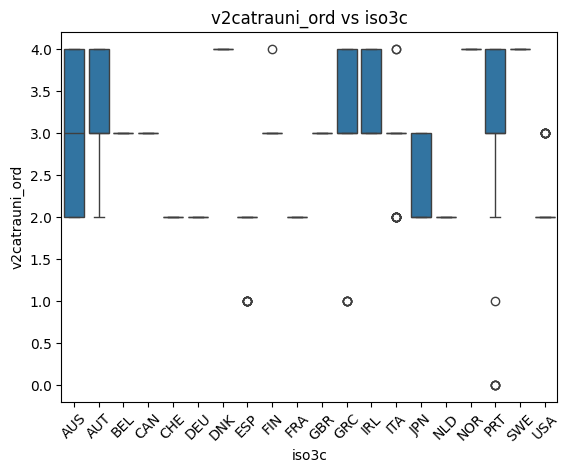

In [15]:
# 5. Bivariate Analysis
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pair plot for selected numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numerical_columns])
plt.show()

# Categorical vs Numerical Analysis
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f"{num_col} vs {cat_col}")
        plt.xticks(rotation=45)
        plt.show()

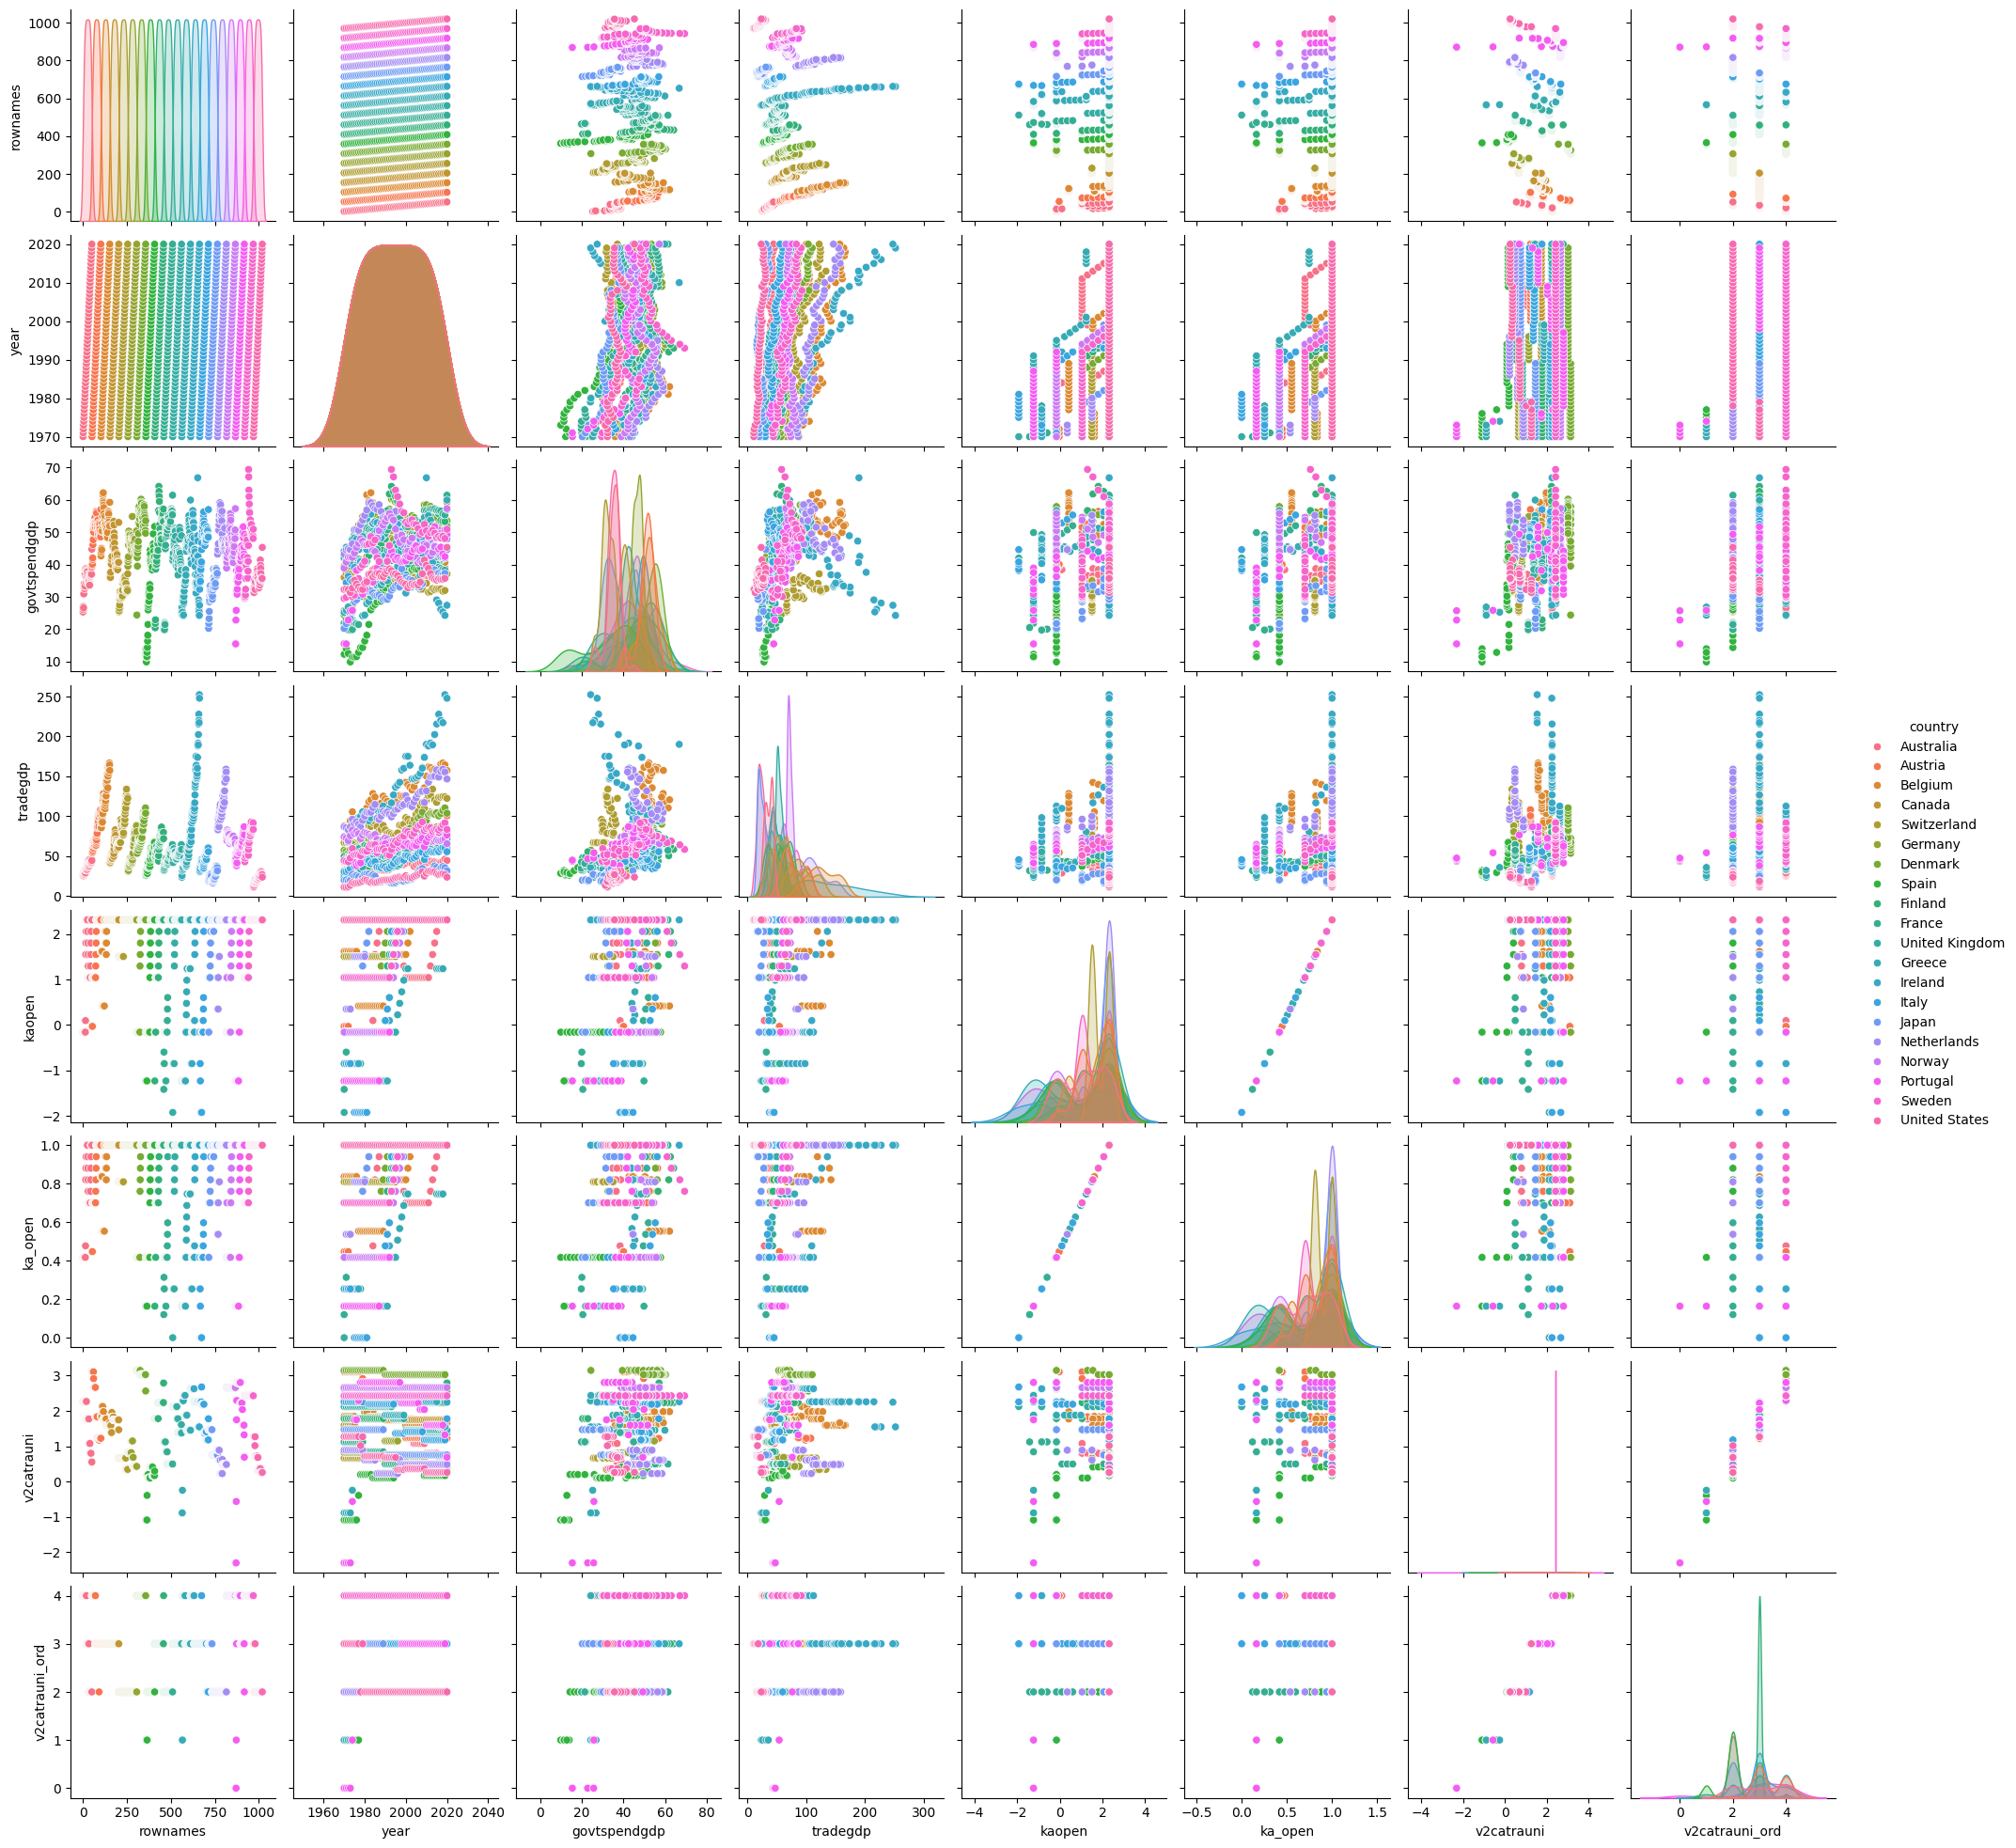

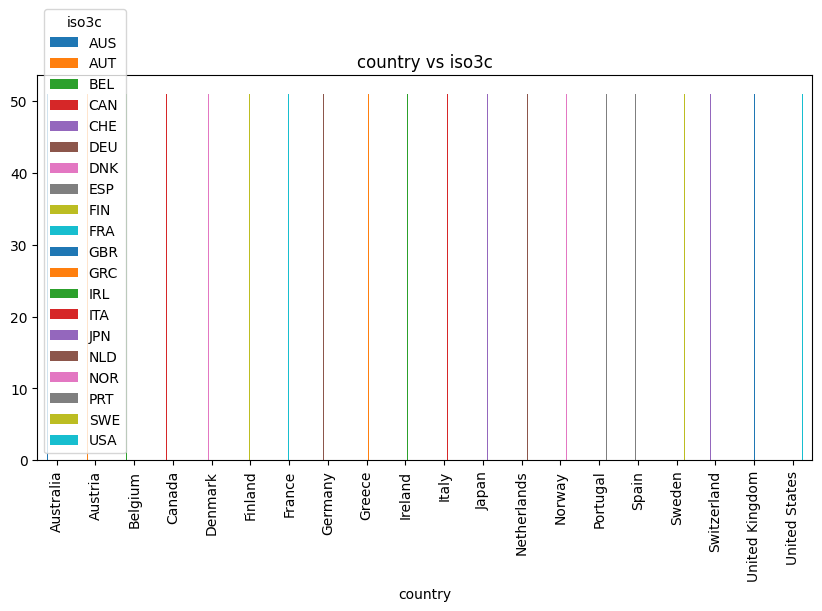


Cleaned dataset saved to: /mnt/data/Cleaned_PPGE.csv


In [17]:
import os  # Import the os module

# 6. Multivariate Analysis
# Pairplot including categorical hues
if len(categorical_columns) > 0:
    sns.pairplot(df, hue=categorical_columns[0])
    plt.show()

# Grouped bar plots for multivariate categorical analysis
if len(categorical_columns) > 1:
    for i, col1 in enumerate(categorical_columns):
        for col2 in categorical_columns[i + 1:]:
            pd.crosstab(df[col1], df[col2]).plot(kind="bar", figsize=(10, 5))
            plt.title(f"{col1} vs {col2}")
            plt.show()

# Save the cleaned and analyzed dataset (optional)
output_path = '/mnt/data/Cleaned_PPGE.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Now os is defined

df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")



Statistical Analysis:

--- govtspendgdp ---
Mean: 43.25
Median: 44.60
Mode: 44.39
Variance: 93.17
Standard Deviation: 9.65

--- tradegdp ---
Mean: 66.69
Median: 59.90
Mode: nan
Variance: 1267.48
Standard Deviation: 35.60

Covariance between govtspendgdp and tradegdp: 107.88
Correlation between govtspendgdp and tradegdp: 0.32



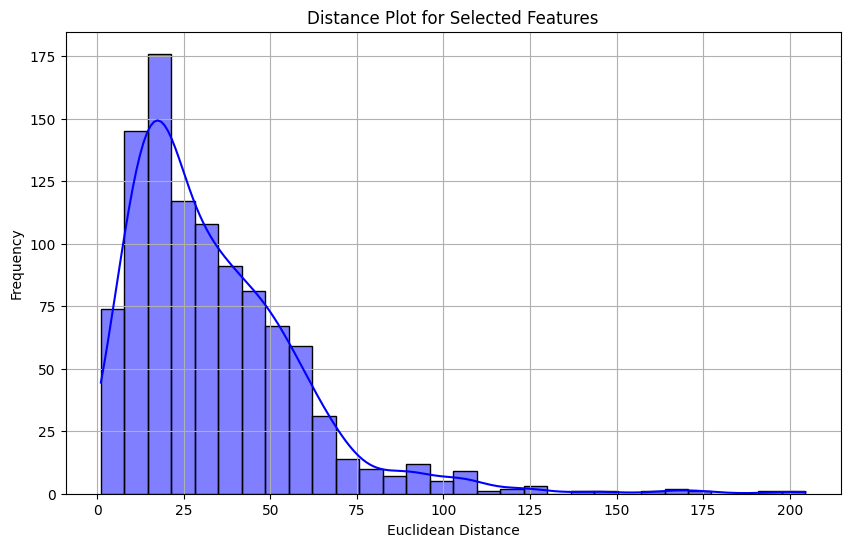

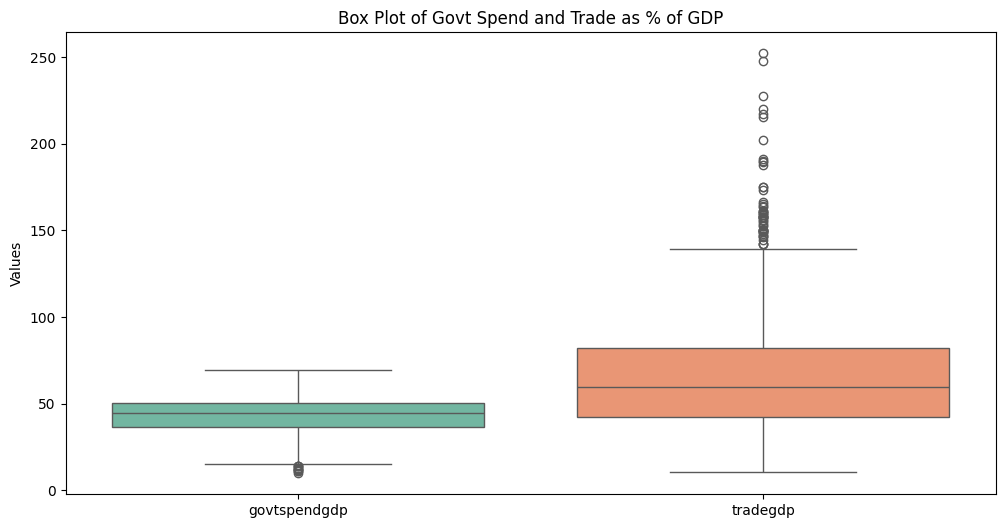

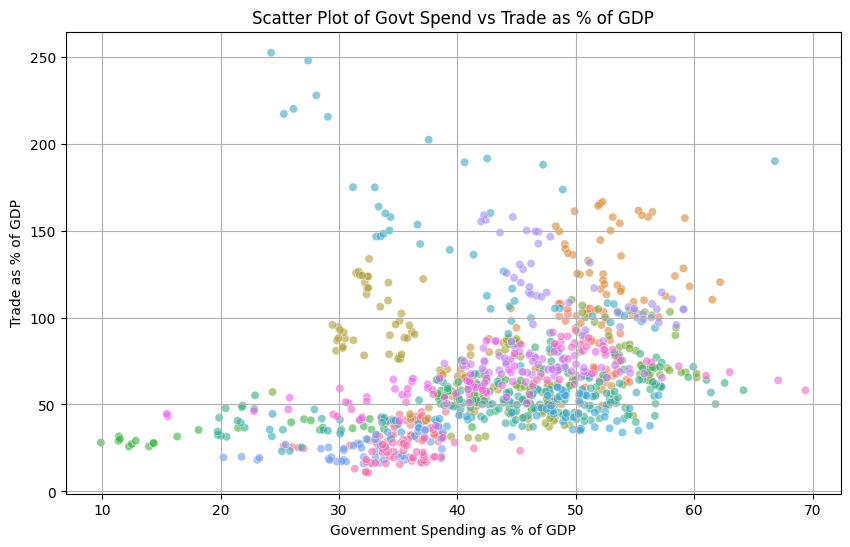

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# Load the dataset
file_path = '/content/PPGE.csv'  # Update the file path as per your Drive location
data = pd.read_csv(file_path)

# Select columns for analysis
selected_features = ['govtspendgdp', 'tradegdp']

# --- Statistical Analysis ---
print("Statistical Analysis:\n")

for feature in selected_features:
    print(f"--- {feature} ---")
    print(f"Mean: {data[feature].mean():.2f}")
    print(f"Median: {data[feature].median():.2f}")
    # Access the mode value directly using .mode[0]
    print(f"Mode: {mode(data[feature]).mode:.2f}")
    print(f"Variance: {data[feature].var():.2f}")
    print(f"Standard Deviation: {data[feature].std():.2f}\n")

# Covariance and Correlation
covariance = data['govtspendgdp'].cov(data['tradegdp'])
correlation = data['govtspendgdp'].corr(data['tradegdp'])
print(f"Covariance between govtspendgdp and tradegdp: {covariance:.2f}")
print(f"Correlation between govtspendgdp and tradegdp: {correlation:.2f}\n")

# --- Distance Plot ---
distance = np.sqrt((data[selected_features] - data[selected_features].mean())**2).sum(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(distance, bins=30, kde=True, color='blue')
plt.title('Distance Plot for Selected Features')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# --- Box Plot ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[selected_features], palette='Set2')
plt.title('Box Plot of Govt Spend and Trade as % of GDP')
plt.ylabel('Values')
plt.show()

# --- Scatter Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='govtspendgdp', y='tradegdp', data=data, hue='country', legend=False, alpha=0.6)
plt.title('Scatter Plot of Govt Spend vs Trade as % of GDP')
plt.xlabel('Government Spending as % of GDP')
plt.ylabel('Trade as % of GDP')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      1.00      0.67         2
           2       0.76      0.75      0.76        56
           3       0.68      0.73      0.71        74
           4       0.83      0.74      0.78        66

    accuracy                           0.74       198
   macro avg       0.56      0.64      0.58       198
weighted avg       0.75      0.74      0.75       198

Accuracy Score: 0.7424242424242424


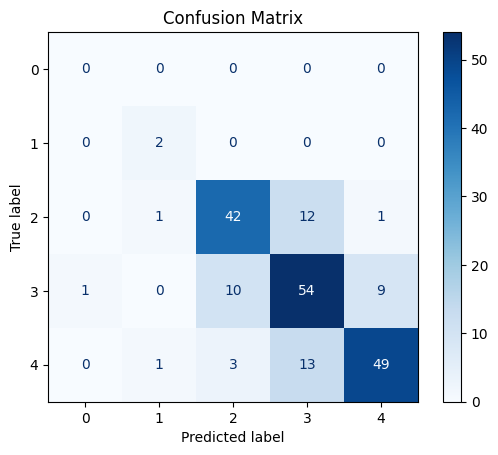

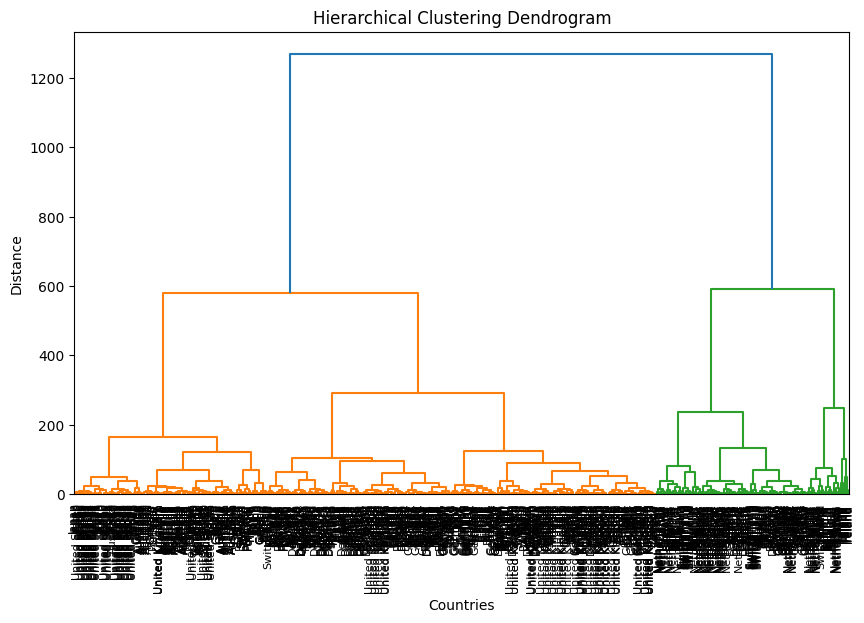

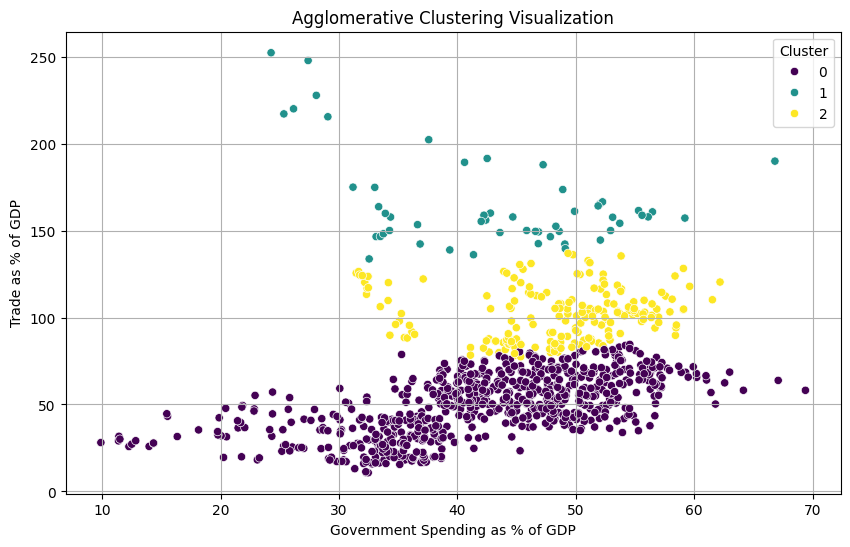

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# --- Data Preprocessing ---
# Select features and target
features = ['govtspendgdp', 'tradegdp', 'kaopen']
target = 'v2catrauni_ord'

# Drop rows with missing values for simplicity
data = data.dropna(subset=features + [target])

# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Classification ---
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# --- Hierarchical Clustering ---
# Perform hierarchical clustering
Z = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=data['country'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

# --- Agglomerative Clustering ---
# Perform agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_cluster.fit_predict(X)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='govtspendgdp', y='tradegdp', hue='Cluster', data=data, palette='viridis')
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Government Spending as % of GDP')
plt.ylabel('Trade as % of GDP')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



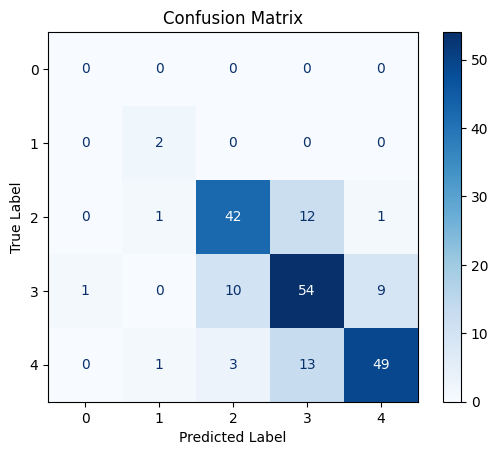

In [31]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()


Contingency Table:
year            1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  \
v2catrauni_ord                                                               
0                  1     1     1     1     0     0     0     0     0     0   
1                  2     2     2     2     3     1     1     1     0     0   
2                  3     3     3     3     3     2     2     2     4     3   
3                  7     7     7     7     7     8     8     7     6     7   
4                  6     6     6     6     6     7     7     8     8     8   

year            ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
v2catrauni_ord  ...                                                         
0               ...     0     0     0     0     0     0     0     0     0   
1               ...     0     0     0     0     0     0     0     0     0   
2               ...     9     9     9     9     9     9     9     9     9   
3               ...     8     8     8     8     8

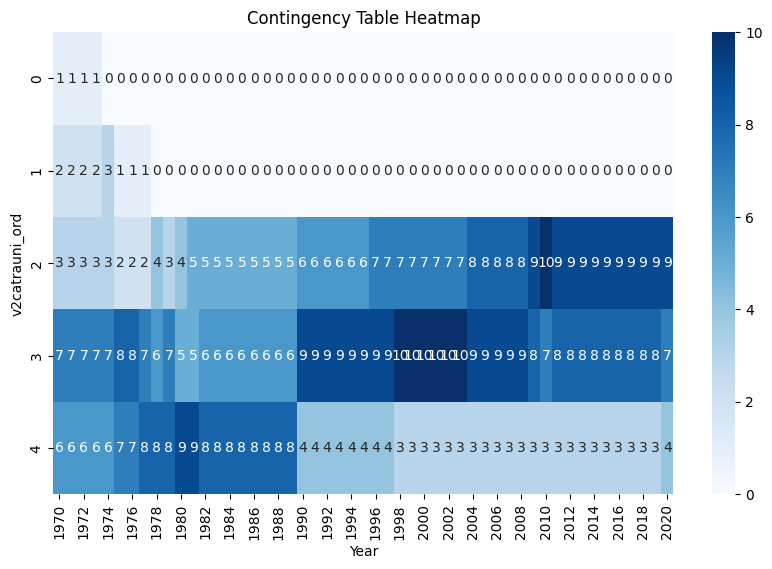

In [32]:
# Create a contingency table
contingency_table = pd.crosstab(data['v2catrauni_ord'], data['year'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Visualize the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table Heatmap')
plt.xlabel('Year')
plt.ylabel('v2catrauni_ord')
plt.show()


In [33]:
# Import necessary libraries
import pandas as pd
from scipy.stats import chi2_contingency

# Create a Contingency Table (Cross-tabulation) between 'v2catrauni_ord' and 'year'
contingency_table = pd.crosstab(data['v2catrauni_ord'], data['year'])

# Display the Contingency Table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results of the Chi-Square Test
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")
print(f"P-Value: {p}")

# Interpretation of the result
alpha = 0.05  # significance level
if p < alpha:
    print("There is a significant relationship between 'v2catrauni_ord' and 'year' (reject H0).")
else:
    print("There is no significant relationship between 'v2catrauni_ord' and 'year' (fail to reject H0).")


Contingency Table:
year            1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  \
v2catrauni_ord                                                               
0                  1     1     1     1     0     0     0     0     0     0   
1                  2     2     2     2     3     1     1     1     0     0   
2                  3     3     3     3     3     2     2     2     4     3   
3                  7     7     7     7     7     8     8     7     6     7   
4                  6     6     6     6     6     7     7     8     8     8   

year            ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
v2catrauni_ord  ...                                                         
0               ...     0     0     0     0     0     0     0     0     0   
1               ...     0     0     0     0     0     0     0     0     0   
2               ...     9     9     9     9     9     9     9     9     9   
3               ...     8     8     8     8     8

In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Select the predictor variable (X) and response variable (y)
# Example: Predict 'govtspendgdp' based on 'tradegdp' (use your columns accordingly)
X = data[['tradegdp']]  # Predictor variable(s)
y = data['govtspendgdp']  # Response variable

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients (slope) and the intercept
slope = model.coef_[0]
intercept = model.intercept_

# Display the results
print(f"Linear Regression Coefficients:")
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")


Linear Regression Coefficients:
Slope (Coefficient): 0.0876217709214541
Intercept: 37.73317395350535


Polynomial Regression Coefficients (degree 3):
Coefficients: [ 0.00000000e+00  7.35294062e-01 -5.04543060e-03  9.06977769e-06]
Intercept: 17.892150721078476


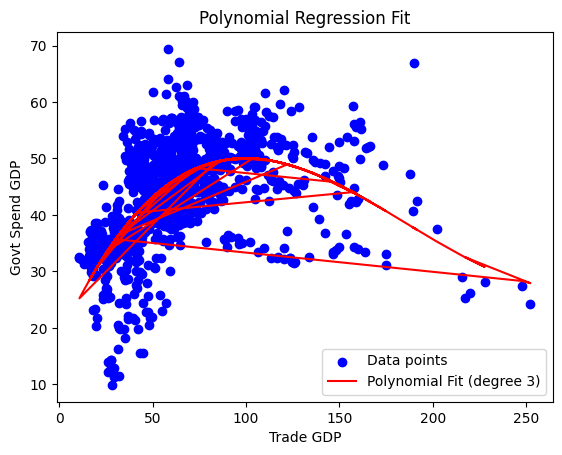

In [35]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Select the predictor variable (X) and response variable (y)
# Example: Predict 'govtspendgdp' based on 'tradegdp' (use your columns accordingly)
X = data[['tradegdp']]  # Predictor variable(s)
y = data['govtspendgdp']  # Response variable

# Create polynomial features (degree of the polynomial)
degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)

# Transform the predictor variable into polynomial features
X_poly = poly.fit_transform(X)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, y)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Display the results
print(f"Polynomial Regression Coefficients (degree {degree}):")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Visualize the polynomial regression fit
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X_poly), color='red', label=f'Polynomial Fit (degree {degree})')
plt.xlabel('Trade GDP')
plt.ylabel('Govt Spend GDP')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()


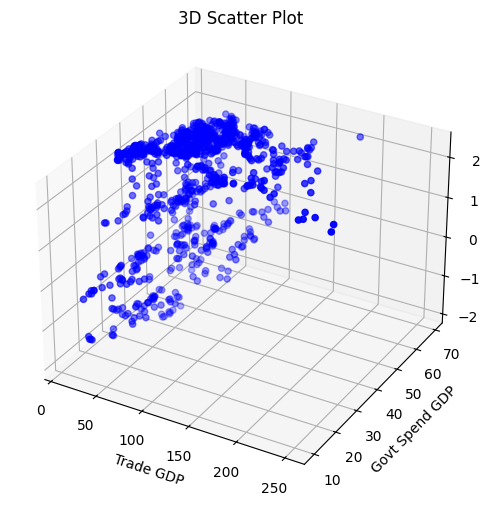

In [38]:
#3d scatter plot
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = data['tradegdp']   # Example: Trade GDP
y = data['govtspendgdp']  # Example: Govt Spend GDP
z = data['kaopen']  # Example: Capital Account Openness

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, c='blue', marker='o')

# Labels and title
ax.set_xlabel('Trade GDP')
ax.set_ylabel('Govt Spend GDP')
ax.set_zlabel('Ka Open')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()



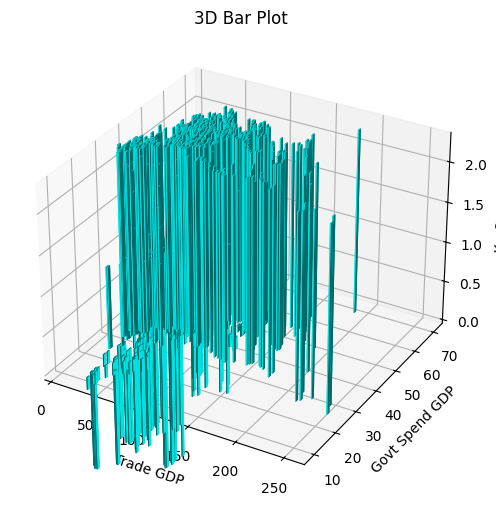

In [39]:
#3d bar plot

x = data['tradegdp']  # Example: Trade GDP
y = data['govtspendgdp']  # Example: Govt Spend GDP
z = np.zeros(len(data))  # Bars start from z=0
dx = np.ones(len(data))  # Width of the bars in x direction
dy = np.ones(len(data))  # Width of the bars in y direction
dz = data['kaopen']  # Example: Height of the bars (using 'kaopen' variable)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 3D bar plot
ax.bar3d(x, y, z, dx, dy, dz, color='cyan')

# Labels and title
ax.set_xlabel('Trade GDP')
ax.set_ylabel('Govt Spend GDP')
ax.set_zlabel('Ka Open')
ax.set_title('3D Bar Plot')

# Show the plot
plt.show()


     country  Cluster
0  Australia        1
1  Australia        1
2  Australia        1
3  Australia        1
4  Australia        1


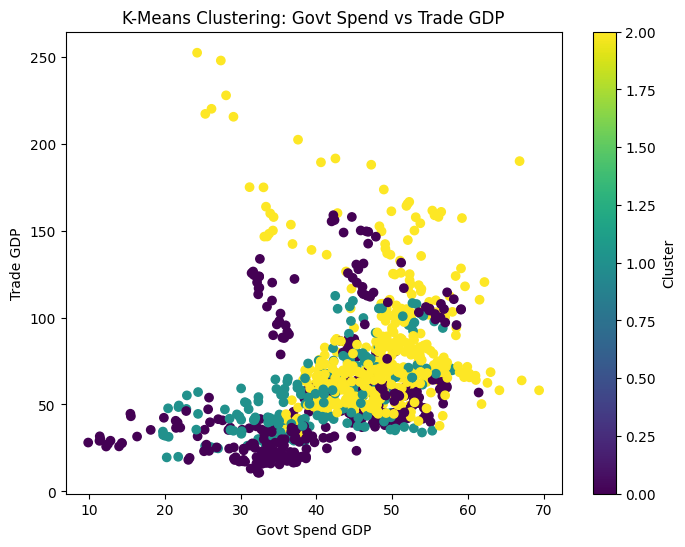

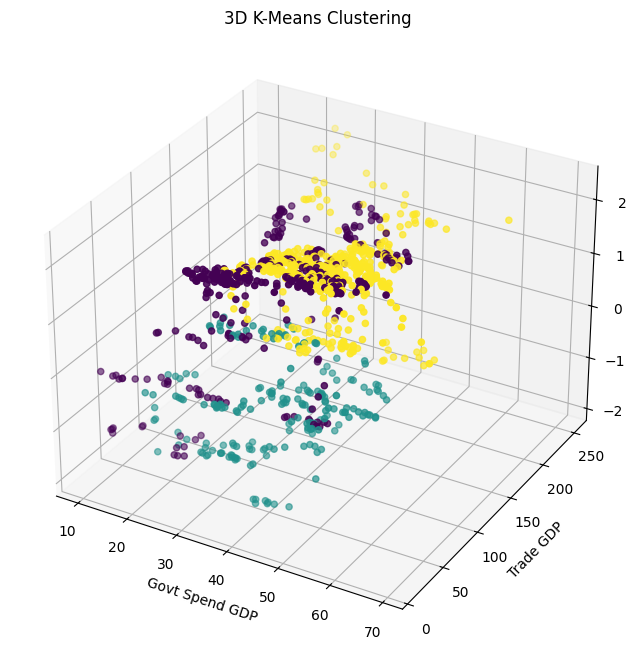

In [40]:
#k mean clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for clustering (replace with actual column names if needed)
X = data[['govtspendgdp', 'tradegdp', 'kaopen', 'ka_open', 'v2catrauni', 'v2catrauni_ord']]

# Standardize the data (optional but recommended for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters (n_clusters)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# View the cluster assignments
print(data[['country', 'Cluster']].head())

# Visualize the clustering results (2D visualization using two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(data['govtspendgdp'], data['tradegdp'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering: Govt Spend vs Trade GDP')
plt.xlabel('Govt Spend GDP')
plt.ylabel('Trade GDP')
plt.colorbar(label='Cluster')
plt.show()

# If you want a 3D visualization, you can use the following code
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['govtspendgdp'], data['tradegdp'], data['kaopen'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Govt Spend GDP')
ax.set_ylabel('Trade GDP')
ax.set_zlabel('Ka Open')
ax.set_title('3D K-Means Clustering')
plt.show()


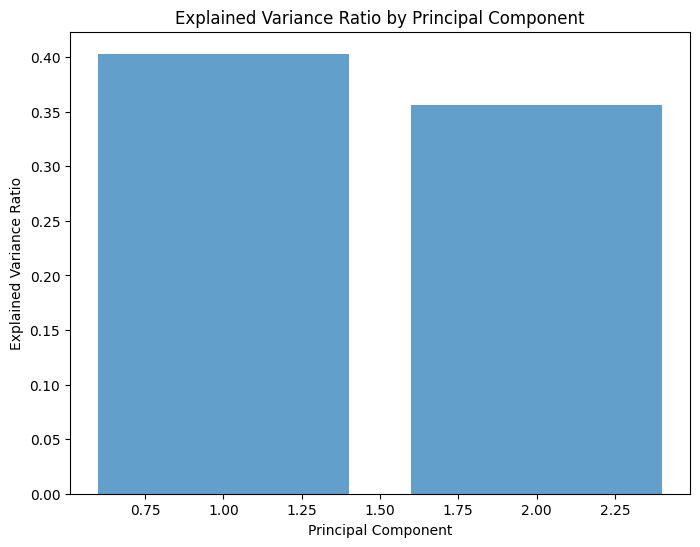

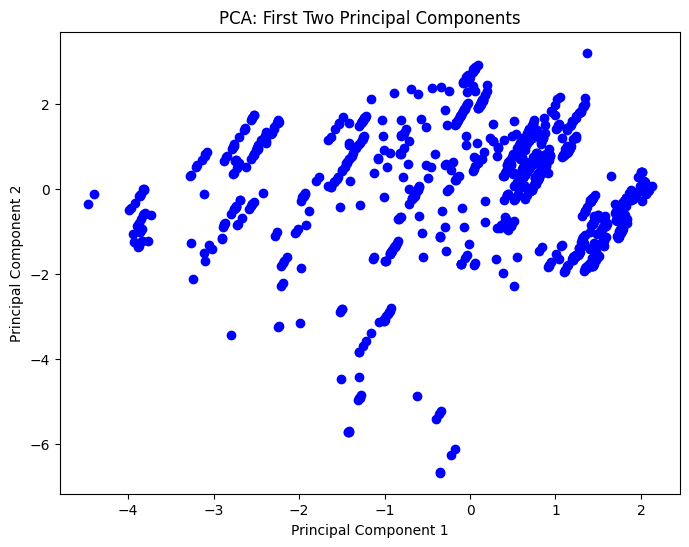

In [41]:
#pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Select the numerical columns for PCA
X = data[['govtspendgdp', 'tradegdp', 'kaopen', 'ka_open', 'v2catrauni', 'v2catrauni_ord']]  # Adjust as per your data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # You can change this to any number of components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the first two principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Visualize the explained variance ratio for each component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Visualize the first two principal components (2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.show()


Accuracy: 100.00%


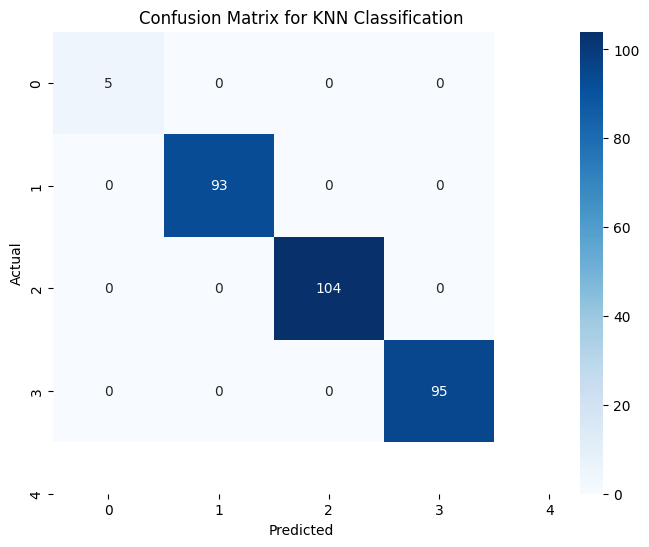

In [42]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Select features and target variable (adjust these columns based on your dataset)
X = data[['govtspendgdp', 'tradegdp', 'kaopen', 'ka_open', 'v2catrauni', 'v2catrauni_ord']]  # Features
y = data['v2catrauni_ord']  # Target variable (assuming it's categorical)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the KNN model (you can adjust the number of neighbors)
knn = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors (n_neighbors)

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for KNN Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
